In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import osla 

In [5]:
def calculo_graficas(xls_ppt, folder_data_outputs, folder_image_outputs, campo_estacion_1, campo_estacion_2, id_parcerla):
    
    df_precipitaciones = pd.read_excel(xls_ppt)
    df_precipitaciones.dtypes
    
    df_precipitaciones["FECHALECTURA"] = df_precipitaciones["FECHALECTURA"].astype('datetime64[ns]')
    df_precipitaciones
    
    #verificar siempre el indice de las columnas donde esta el valor de la ppt de las estaciones
    df_precipitaciones["PROMEDIO"] =  (df_precipitaciones.iloc[:, 1] + df_precipitaciones.iloc[:, 2])/2
    df_precipitaciones

    a_indices = df_precipitaciones.index.to_numpy()
    a_val_ppt_1 = df_precipitaciones.iloc[:, 1].to_numpy()
    a_val_ppt_2 = df_precipitaciones.iloc[:, 2].to_numpy()
    a_fechas_lecturas = df_precipitaciones.iloc[:, 0].to_numpy()
    
    
    # ploteando precipitaciones
    g_indices = a_indices
    g_ppt_1 = a_val_ppt_1
    g_ppt_2 = a_val_ppt_2
    g_fecha_lec = a_fechas_lecturas

    fig, ax = plt.subplots()
    ax.grid()

    plt.title('Precipitaciones acumulado Estación 1 Vs Estación 2')
    plt.xlabel('Lecturas')
    plt.ylabel('Precipitación mm3')

    plt.plot(g_indices, g_ppt_1, 'r')
    plt.plot(g_indices, g_ppt_2, 'g')
    plt.legend([campo_estacion_1, campo_estacion_2], loc ="upper right")
    plt.figure(figsize=(10, 10))
    plt.show()

    image_format = 'jpeg'
    image_name = id_parcerla + '.jpeg'
    fig.savefig(os.path.join(folder_image_outputs, image_name), format=image_format, dpi=400)
    plt.show()
    
    
    df_filtered = df_precipitaciones[[campo_estacion_1, campo_estacion_2]]
    df_filtered
    
    def r2(x, y):
        return sp.stats.pearsonr(x, y)[0] ** 2

    r2_val = r2(df_filtered[campo_estacion_1], y=df_filtered[campo_estacion_2])

    plt.figure(figsize=(10,10))
    plt.title('REGRESIÓN PRECIPITACIONES')
    ax = sns.regplot(x = campo_estacion_1, y = campo_estacion_2, data = df_filtered)
    ax.text(max(df_filtered[campo_estacion_1])-2, max(df_filtered[campo_estacion_2])-2,'R2 = ' + str(round(r2_val, 2)), fontsize=9) #add text
    ax.grid()
    image_name_2 = 'Regresion_precipitaciones_' + id_parcerla + '.jpeg'
    plt.savefig(os.path.join(folder_image_outputs, image_name_2), dpi=300)
    plt.show()
    
    df_precipitaciones.to_excel(os.path.join(folder_data_outputs, "summ_precipitaciones_" + id_parcerla + ".xlsx"))
    
    print("Exito...")

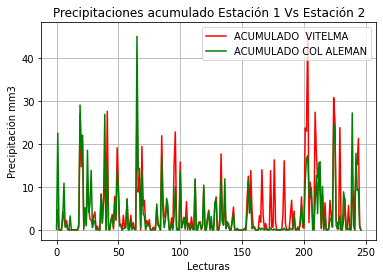

<Figure size 720x720 with 0 Axes>

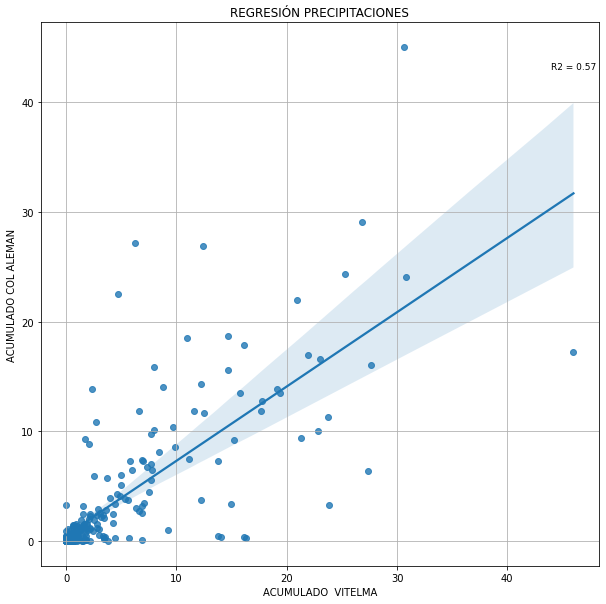

Exito...


In [6]:
xls = pd.ExcelFile(r'D:\UAESP\Corte_Cesped\file_test.xlsx')
folder_data_outputs = r"D:\UAESP\Corte_Cesped\data_outputs"
folder_image_outputs = r"D:\UAESP\Corte_Cesped\plots_outputs_2"
nom_estacion_1 = "ACUMULADO  VITELMA"
nom_estacion_2 = "ACUMULADO COL ALEMAN"
nom_parcerla = "PARCELA_1"

calculo_graficas(xls, folder_data_outputs, folder_image_outputs, nom_estacion_1, nom_estacion_2, nom_parcerla)

In [8]:
def calculo_tabla_final(xls_fechas_cortes, xls_new_precipitaciones, folder_output_salida, campo_fecha_corte,
                        campo_fecha_medicion, campo_promedio, id_parcerla):
    
    df_fechas_cortes = pd.read_excel(xls_fechas_cortes)
    df_fechas_cortes.dtypes
    df_precipitaciones = pd.read_excel(xls_new_precipitaciones)
    df_fechas_cortes = df_fechas_cortes.dropna()
    
    #conseguir fechas unicas
    fechas_unicas = df_fechas_cortes[[campo_fecha_corte]]
    df_fechas_unicas = fechas_unicas.drop_duplicates(campo_fecha_corte).reset_index(drop=True)

    a_fechas_corte = []
    a_fechas_medicion = []
    a_ppt_promedio = []
    a_alt_promedio_pasto = []
    a_ppt_promedio_acumulado = []
    a_diff_promedio_alt_pasto = []
    a_valores_index = []

    for j in range(0, len(df_fechas_unicas)):
        #consiguiendo fechas de cortes y promedio altura pasto
        inicial_fecha_corte = df_fechas_unicas[campo_fecha_corte].values[j]
        df_fechas_unicas_filtered = df_fechas_cortes[df_fechas_cortes[campo_fecha_corte] == inicial_fecha_corte]
        ultima_fecha_medicion = df_fechas_unicas_filtered[campo_fecha_medicion].max()
        ultima_altura_pasto = df_fechas_unicas_filtered[campo_promedio].values[-1]
        diff_altura_pasto = df_fechas_unicas_filtered[campo_promedio].values[-1] - df_fechas_unicas_filtered[campo_promedio].values[0]

        #agregando fechas, altura promedio y diferencia promedio
        a_fechas_corte.append(inicial_fecha_corte)
        a_fechas_medicion.append(ultima_fecha_medicion)
        a_alt_promedio_pasto.append(ultima_altura_pasto)
        a_diff_promedio_alt_pasto.append(diff_altura_pasto)

        #consiguiendo pmm promedio
        df_ultima_ppt_promedio = df_precipitaciones[df_precipitaciones["FECHALECTURA"] == ultima_fecha_medicion]
        val_ultima_ppt_promedio = df_ultima_ppt_promedio["PROMEDIO"].values[0]
        val_ultima_ppt_promedio
        a_ppt_promedio.append(val_ultima_ppt_promedio)

        #consiguiendo pmm promedio acumulado

        valor_salto_index = df_precipitaciones[df_precipitaciones["FECHALECTURA"] == ultima_fecha_medicion].index.values[0]
        a_valores_index.append(valor_salto_index)

        if j == 0:
            df_ppt_promedio_acumulado = df_precipitaciones[(df_precipitaciones["FECHALECTURA"] >= inicial_fecha_corte) &
                                                       (df_precipitaciones["FECHALECTURA"] <= ultima_fecha_medicion)]
        else:
            df_ppt_promedio_acumulado = df_precipitaciones[(df_precipitaciones.index > a_valores_index[j-1]) & 
                                                           (df_precipitaciones["FECHALECTURA"] <= ultima_fecha_medicion)]

        value_ppt_promedio_acumulado = df_ppt_promedio_acumulado["PROMEDIO"].sum()
        a_ppt_promedio_acumulado.append(value_ppt_promedio_acumulado)
        
    df_final_analisis = pd.DataFrame()
    df_final_analisis["fecha_corte"] = a_fechas_corte
    df_final_analisis["fecha_medicion"] = a_fechas_medicion
    df_final_analisis["pmm_prom"] = a_ppt_promedio
    df_final_analisis["h_prom_pasto"] = a_alt_promedio_pasto
    df_final_analisis["pmm_prom_acumulada"] = a_ppt_promedio_acumulado
    df_final_analisis["Hn_H1"] = a_diff_promedio_alt_pasto

    df_final_analisis.to_excel(os.path.join(folder_output_salida, "tabla_final_" + id_parcerla + ".xlsx"))
    print("Exito...")

In [11]:
xls_fechas_cortes = pd.ExcelFile(r'D:\UAESP\Corte_Cesped\file_test_2_fechas_cortes_.xlsx')
xls_new_precipitacion = pd.ExcelFile(r'D:\UAESP\Corte_Cesped\data_outputs\summ_precipitaciones_PARCELA_1.xlsx')
folder_outputs_tabla_final = r"D:\UAESP\Corte_Cesped\data_outputs"
cnom_fecha_corte = "Fecha Corte"
cnom_fecha_medicion = "Fecha de Medición"
cnom_promedio = "Promedio"
cnom_parcerla = "PARCELA_1"

calculo_tabla_final(xls_fechas_cortes, xls_new_precipitacion, folder_outputs_tabla_final, cnom_fecha_corte, cnom_fecha_medicion, 
                    cnom_promedio, cnom_parcerla)

Exito...
